In [330]:
import pandas as pd
from pandas import Series,DataFrame
import numpy as np
from numpy.random import randn

import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('whitegrid')
%matplotlib inline


import statsmodels.formula.api as smf
from sklearn.model_selection import train_test_split
import statsmodels.api as sm

from sklearn.feature_selection import RFE   

from sklearn.neighbors import KNeighborsClassifier

from sklearn.naive_bayes import GaussianNB
from sklearn import metrics


import math
from sklearn import tree

import sklearn
from sklearn.linear_model import LinearRegression
from sklearn import linear_model

import sklearn.datasets 

from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier

from sklearn.feature_selection import RFE   # Recursive Feature Elimination
from sklearn.svm import SVR                 # Support Vector Regression
import sklearn
from sklearn.linear_model import LogisticRegression

from sklearn.metrics import accuracy_score

from sklearn.feature_selection import RFE   # Recursive Feature Elimination
from sklearn.svm import SVR                 # Support Vector Regression
from sklearn.svm import SVC

In [331]:
#our dataset

df = pd.read_csv('Students.csv')

# data binning

binning is when you group values together into bins. for example, we can bin student testscores into [0 t0 41 as fail], [12 to 57 as good,] and [58 to 60 as very good.] depending on the numbers of binning we want


In [332]:
df.head(2)

,ID,Gender,Age,StudentId,Attendance,TestScore
0,0,male,58,81 gn,0.81,64.76
1,1,male,54,02 Wd,0.55,35.11


In [333]:
#now, lets group our student testscores into four bins.

bins = [0, 43, 57,78, 100]

group_grade_names = ['fail', 'good', 'very good', 'excellent']

df['testscore_grade']= pd.cut(df['TestScore'], bins,labels =group_grade_names)
df

,ID,Gender,Age,StudentId,Attendance,TestScore,testscore_grade
0,0,male,58,81 gn,0.81,64.76,very good
1,1,male,54,02 Wd,0.55,35.11,fail
2,2,male,50,83 Kc,0.62,60.24,very good
3,3,male,34,43 RB,0.84,69.97,very good
4,4,male,58,61 sy,0.59,36.89,fail
5,5,female,74,60 IQ,0.73,54.90,good
6,6,male,55,43 iR,0.79,68.51,very good
7,7,male,57,50 Ui,0.58,52.56,good
8,8,male,71,79 ML,0.90,66.15,very good
9,9,female,25,72 lt,0.81,73.38,very good


# Data cleaning


In [334]:
#let check for the percentage of missing data

percentage_of_missing_data = df.isnull().sum()
percentage_of_missing_data

ID                 0
Gender             0
Age                0
StudentId          0
Attendance         0
TestScore          0
testscore_grade    0
dtype: int64

In [335]:
#let check if there are NA values in our data


df.isna()

,ID,Gender,Age,StudentId,Attendance,TestScore,testscore_grade
0,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False
5,False,False,False,False,False,False,False
6,False,False,False,False,False,False,False
7,False,False,False,False,False,False,False
8,False,False,False,False,False,False,False
9,False,False,False,False,False,False,False


In [336]:
#lets drop NA values in case of any

df.dropna()

,ID,Gender,Age,StudentId,Attendance,TestScore,testscore_grade
0,0,male,58,81 gn,0.81,64.76,very good
1,1,male,54,02 Wd,0.55,35.11,fail
2,2,male,50,83 Kc,0.62,60.24,very good
3,3,male,34,43 RB,0.84,69.97,very good
4,4,male,58,61 sy,0.59,36.89,fail
5,5,female,74,60 IQ,0.73,54.90,good
6,6,male,55,43 iR,0.79,68.51,very good
7,7,male,57,50 Ui,0.58,52.56,good
8,8,male,71,79 ML,0.90,66.15,very good
9,9,female,25,72 lt,0.81,73.38,very good


In [337]:
#lets drop all NA/NAN values 

df.dropna(axis = 'index', how='all')

,ID,Gender,Age,StudentId,Attendance,TestScore,testscore_grade
0,0,male,58,81 gn,0.81,64.76,very good
1,1,male,54,02 Wd,0.55,35.11,fail
2,2,male,50,83 Kc,0.62,60.24,very good
3,3,male,34,43 RB,0.84,69.97,very good
4,4,male,58,61 sy,0.59,36.89,fail
5,5,female,74,60 IQ,0.73,54.90,good
6,6,male,55,43 iR,0.79,68.51,very good
7,7,male,57,50 Ui,0.58,52.56,good
8,8,male,71,79 ML,0.90,66.15,very good
9,9,female,25,72 lt,0.81,73.38,very good


In [338]:
df.dropna(axis = 'index', how='any')

,ID,Gender,Age,StudentId,Attendance,TestScore,testscore_grade
0,0,male,58,81 gn,0.81,64.76,very good
1,1,male,54,02 Wd,0.55,35.11,fail
2,2,male,50,83 Kc,0.62,60.24,very good
3,3,male,34,43 RB,0.84,69.97,very good
4,4,male,58,61 sy,0.59,36.89,fail
5,5,female,74,60 IQ,0.73,54.90,good
6,6,male,55,43 iR,0.79,68.51,very good
7,7,male,57,50 Ui,0.58,52.56,good
8,8,male,71,79 ML,0.90,66.15,very good
9,9,female,25,72 lt,0.81,73.38,very good


# quick wrangling of our data

In [339]:
#lets know the numbers of male and female

df['Gender'].value_counts()

male      4954
female    4926
Name: Gender, dtype: int64

In [340]:
#lets know the number of student with highest textscore

Student_highest_TestScore =(df['TestScore']> 99.92)
df.loc[ Student_highest_TestScore] 

,ID,Gender,Age,StudentId,Attendance,TestScore,testscore_grade
307,311,female,43,73 nb,0.97,99.95,excellent
4868,4930,male,46,22 FP,0.84,99.93,excellent
8604,8703,female,77,69 Al,0.97,99.93,excellent


In [341]:
#lets know the number of student with lowest textscore

Student_lowest_TestScore =(df['TestScore']< 1.30)
df.loc[ Student_lowest_TestScore] 

,ID,Gender,Age,StudentId,Attendance,TestScore,testscore_grade
70,70,male,46,20 LU,0.21,0.01,fail
1070,1085,female,24,49 qb,0.31,1.03,fail
1236,1257,male,49,61 bx,0.25,1.22,fail
1527,1551,female,58,33 ed,0.15,0.50,fail
1959,1986,male,75,93 ZM,0.28,0.90,fail


In [342]:
#let see the median of our data

df.median()

ID            5002.50
Age             49.00
Attendance       0.75
TestScore       64.44
dtype: float64

In [343]:
df.describe()

,ID,Age,Attendance,TestScore
count,9880.000000,9880.000000,9880.000000,9880.000000
mean,4999.213664,49.367206,0.730917,63.089545
std,2884.242943,14.975675,0.151874,17.736368
min,0.000000,1.000000,0.150000,0.010000
25%,2503.750000,39.000000,0.630000,51.677500
50%,5002.500000,49.000000,0.750000,64.440000
75%,7493.250000,60.000000,0.850000,76.150000
max,9999.000000,100.000000,1.000000,99.950000


In [344]:
 #lets see the Number of male student Testscore that are above 99
    
df[(df['Gender'] == 'male') &
     (df['TestScore'] > 99.30)]

,ID,Gender,Age,StudentId,Attendance,TestScore,testscore_grade
33,33,male,65,70 FO,0.93,99.65,excellent
1334,1355,male,60,44 qq,0.98,99.38,excellent
1580,1605,male,55,14 hH,0.87,99.61,excellent
3610,3656,male,28,54 ea,0.94,99.49,excellent
4868,4930,male,46,22 FP,0.84,99.93,excellent
6437,6509,male,22,96 xO,0.96,99.59,excellent
6944,7022,male,23,73 ke,0.89,99.91,excellent
9342,9457,male,37,94 uI,0.88,99.91,excellent


In [345]:
#let see the Number of female student Testscore that are above 99

df[(df['Gender'] == 'female') &
     (df['TestScore'] > 99.30)]

,ID,Gender,Age,StudentId,Attendance,TestScore,testscore_grade
249,250,female,40,85 FN,0.92,99.89,excellent
307,311,female,43,73 nb,0.97,99.95,excellent
334,338,female,54,60 JV,0.94,99.89,excellent
1411,1433,female,60,29 CU,0.92,99.76,excellent
3324,3367,female,53,70 iQ,0.92,99.54,excellent
4578,4639,female,40,11 DT,0.94,99.79,excellent
6443,6515,female,48,06 zX,0.93,99.37,excellent
7508,7593,female,65,62 Mk,0.90,99.38,excellent
8189,8283,female,67,54 ad,0.91,99.85,excellent
8486,8582,female,51,06 VK,0.94,99.40,excellent


In [346]:
#Lets compare the Testscores secured by male and female


df.groupby(['Gender']).agg(['min','median','max'])

ID               Age             Attendance              TestScore  \
       min  median   max min median  max        min median   max       min   
Gender                                                                       
female   5  4964.5  9997   1     49  100       0.15   0.77  1.00      0.50   
male     0  5050.0  9999   3     49   99       0.15   0.73  0.99      0.01   

                      
       median    max  
Gender                
female  66.52  99.95  
male    62.38  99.93

In [347]:
#Lets check the Effect of attandance on Student's TestScore


df[[ 'Gender', 'TestScore', 'Attendance', 'testscore_grade']].groupby(['Gender']).agg('median')

,TestScore,Attendance
Gender,,
female,66.52,0.77
male,62.38,0.73


# data prediction

In [348]:
predictors = ['Age', 'Attendance']

X = df[predictors]
Y = df['TestScore']

In [349]:
trainX, testX, trainY, testY = train_test_split(X, Y, test_size=0.2, random_state=0)


In [350]:
model = LinearRegression()
model.fit(trainX, trainY)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [351]:
model.predict(testX)

array([76.52653651, 66.83108321, 82.40647112, ..., 65.82735826,
       83.40869696, 61.94887712])

In [352]:
model.score(trainX, trainY)

0.6938917318772568

In [353]:
model.coef_

array([-1.49910605e-03,  9.75241933e+01])

In [354]:
model.intercept_

-8.207078715826661

In [355]:
df.corr()

,ID,Age,Attendance,TestScore
ID,1.000000,0.000745,-0.003731,-0.006535
Age,0.000745,1.000000,-0.009055,-0.005486
Attendance,-0.003731,-0.009055,1.000000,0.834613
TestScore,-0.006535,-0.005486,0.834613,1.000000


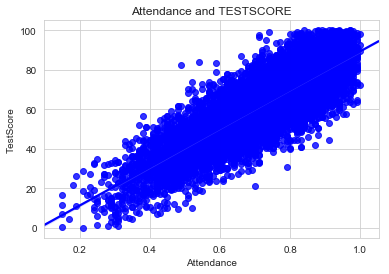

In [356]:
# Plot regression against actual data

sns.regplot(x = 'Attendance', y = 'TestScore', data=df, color='b', )

plt.xlabel('Attendance')
plt.ylabel('TestScore')
plt.title('Attendance and TESTSCORE')

plt.show()


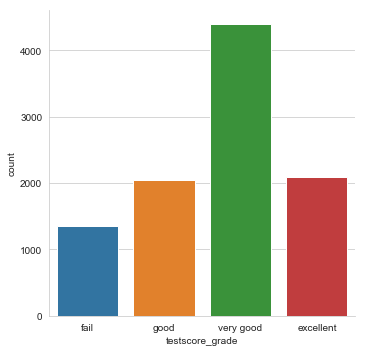

In [357]:
sns.catplot(x = 'testscore_grade',  kind = 'count',  data=df,)

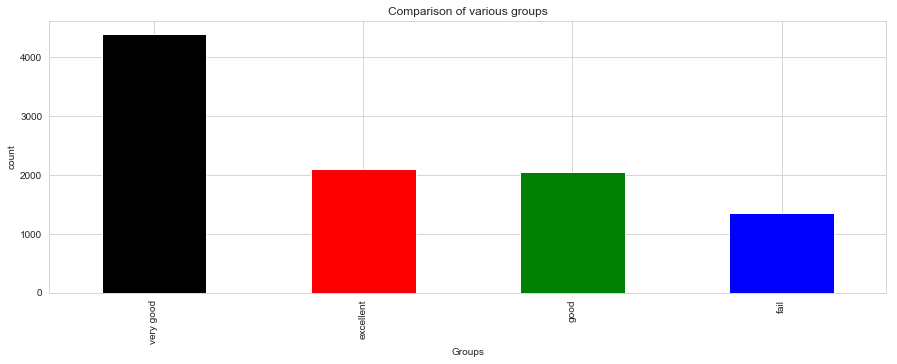

In [358]:
plt.subplots(figsize=(15,5))
df['testscore_grade'].value_counts(normalize = True)
df['testscore_grade'].value_counts(dropna = False).plot.bar(color=['black', 'red', 'green', 'blue', 'cyan'])
plt.title('Comparison of various groups')
plt.xlabel('Groups')
plt.ylabel('count')
plt.show()

In [360]:
df.head()

,ID,Gender,Age,StudentId,Attendance,TestScore,testscore_grade
0,0,male,58,81 gn,0.81,64.76,very good
1,1,male,54,02 Wd,0.55,35.11,fail
2,2,male,50,83 Kc,0.62,60.24,very good
3,3,male,34,43 RB,0.84,69.97,very good
4,4,male,58,61 sy,0.59,36.89,fail


In [361]:
df.head()

,ID,Gender,Age,StudentId,Attendance,TestScore,testscore_grade
0,0,male,58,81 gn,0.81,64.76,very good
1,1,male,54,02 Wd,0.55,35.11,fail
2,2,male,50,83 Kc,0.62,60.24,very good
3,3,male,34,43 RB,0.84,69.97,very good
4,4,male,58,61 sy,0.59,36.89,fail


In [362]:
#now, lets group our student testscores into four bins.

bins = [0, 43, 57,78, 100]

group_grade_names = [0, 1, 2,3]

df['testscore_grade']= pd.cut(df['TestScore'], bins,labels =group_grade_names)
df

,ID,Gender,Age,StudentId,Attendance,TestScore,testscore_grade
0,0,male,58,81 gn,0.81,64.76,2
1,1,male,54,02 Wd,0.55,35.11,0
2,2,male,50,83 Kc,0.62,60.24,2
3,3,male,34,43 RB,0.84,69.97,2
4,4,male,58,61 sy,0.59,36.89,0
5,5,female,74,60 IQ,0.73,54.90,1
6,6,male,55,43 iR,0.79,68.51,2
7,7,male,57,50 Ui,0.58,52.56,1
8,8,male,71,79 ML,0.90,66.15,2
9,9,female,25,72 lt,0.81,73.38,2


In [365]:
df.drop(columns=['ID', 'Gender', 'Age', 'StudentId'], inplace=True)
df.head(4)

,Attendance,TestScore,testscore_grade
0,0.81,64.76,2
1,0.55,35.11,0
2,0.62,60.24,2
3,0.84,69.97,2


# data prediction 

In [366]:

#lets convert our float to integers

cols = ['Attendance', 'TestScore' ]
df[cols] = df[cols].applymap(np.int64)
df.head(2)


,Attendance,TestScore,testscore_grade
0,0,64,2
1,0,35,0


In [367]:
from sklearn.preprocessing import LabelEncoder

In [368]:
# creating an encoder
le = LabelEncoder()

In [394]:
# splitting the dependent and independent variables

x = df.iloc[:,:14]
y = df.iloc[:,1]


In [395]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.25, random_state = 1)


In [396]:

print(x_train.shape)
print(y_train.shape)
print(x_test.shape)
print(y_test.shape)

(7410, 3)
(7410L,)
(2470, 3)
(2470L,)


In [397]:
# importing the MinMaxScaler
from sklearn.preprocessing import MinMaxScaler

# creating a scaler
mm = MinMaxScaler()



In [399]:

# creating a model
log_model = LogisticRegression()

In [400]:
# feeding the training data to the model
log_model.fit(x_train, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=None, solver='warn',
          tol=0.0001, verbose=0, warm_start=False)

In [401]:
y_pred = log_model.predict(x_test)


In [402]:
# calculating the classification accuracies
print("Training Accuracy :", log_model.score(x_train, y_train))
print("Testing Accuracy :", log_model.score(x_test, y_test))

('Training Accuracy :', 0.19365721997300944)
('Testing Accuracy :', 0.18987854251012146)


In [403]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.25, random_state = 1)


In [404]:
rand_model = RandomForestClassifier()


In [405]:
rand_model.fit(x_train, y_train)


RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=None,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)

In [406]:
y_pred = rand_model.predict(x_test)


In [407]:
print("Training Accuracy :", rand_model.score(x_train, y_train))
print("Testing Accuracy :", rand_model.score(x_test, y_test))

('Training Accuracy :', 1.0)
('Testing Accuracy :', 0.9983805668016195)


In [408]:
dtree_model = DecisionTreeClassifier(criterion = 'entropy', random_state=100, max_depth=3, min_samples_leaf= 5)


In [409]:
dtree_model.fit(x_train, y_train)


DecisionTreeClassifier(class_weight=None, criterion='entropy', max_depth=3,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=5, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=100,
            splitter='best')

In [410]:
y_pred = dtree_model.predict(x_test)


In [411]:
print("Training Accuracy :", dtree_model.score(x_train, y_train))
print("Testing Accuracy :", dtree_model.score(x_test, y_test))

('Training Accuracy :', 0.15587044534412955)
('Testing Accuracy :', 0.1562753036437247)


In [412]:

vect_model = SVC()

vect_model.fit(x_train,y_train)

SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto_deprecated',
  kernel='rbf', max_iter=-1, probability=False, random_state=None,
  shrinking=True, tol=0.001, verbose=False)

In [413]:
y_pred = vect_model.predict(x_test)

In [414]:
print("Training Accuracy :", vect_model.score(x_train, y_train))
print("Testing Accuracy :", vect_model.score(x_test, y_test))

('Training Accuracy :', 1.0)
('Testing Accuracy :', 0.9987854251012146)


In [415]:
naive_bayes_model = GaussianNB()
naive_bayes_model.fit(x_train,y_train)


GaussianNB(priors=None, var_smoothing=1e-09)

In [416]:
y_pred = naive_bayes_model.predict(x_test)

In [417]:
print("Training Accuracy :", naive_bayes_model.score(x_train, y_train))
print("Testing Accuracy :", naive_bayes_model.score(x_test, y_test))

('Training Accuracy :', 1.0)
('Testing Accuracy :', 0.9987854251012146)


In [418]:

knn_model = KNeighborsClassifier(n_neighbors = 6)

knn_model.fit(x_train,y_train)

Y_pred = knn_model.predict(x_test)


In [419]:
print("Training Accuracy :", naive_bayes_model.score(x_train, y_train))
print("Testing Accuracy :", naive_bayes_model.score(x_test, y_test))

('Training Accuracy :', 1.0)
('Testing Accuracy :', 0.9987854251012146)
